In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import skimage.measure as measure
import glob
import os

In [24]:
def txt2labelarray(txtFile):
    true_boxes = []

    with open(txtFile) as f:
        for cnt, line in enumerate(f):
            c,x,y,w,h = map(float, line.split())
            x = x*1024
            y = y*1024
            w = w*1024
            h = h*1024
            x1 = x - w/2
            x2 = x + w/2
            y1 = y - h/2
            y2 = y + h/2
            lis_for_each_sample = []
            lis_for_each_sample.append(0)
            lis_for_each_sample.append(x1)
            lis_for_each_sample.append(y1)
            lis_for_each_sample.append(x2)
            lis_for_each_sample.append(y2)
            
            true_boxes.append(lis_for_each_sample)
        labels = np.asarray(true_boxes)
    return labels

In [25]:
def entropy_image(image, exp_time, labels=False, whole_img=True):
    entropys = [exp_time]
    if whole_img:
        entropy = measure.shannon_entropy(image)
        entropys.append(entropy)
    if labels.shape:
        for idx in range(labels.shape[0]):
            label = labels[idx]
            image_crop = image[int(label[2]):int(label[4]), int(label[1]):int(label[3]),:]
            # cv2.imwrite(str(exp_time)+".png", image_crop)
            entropy = measure.shannon_entropy(image_crop)
            entropys.append(entropy)
    
    return entropys

In [5]:

def entropy_split(image, labels):
    entropys = []
    for idx in range(labels.shape[0]):
        label = labels[idx]
        image_crop = image[int(label[2]):int(label[4]), int(label[1]):int(label[3]),:]
        # cv2.imwrite(str(exp_time)+".png", image_crop)
        entropy = measure.shannon_entropy(image_crop)
        entropys.append(entropy)

    return entropys

In [6]:
def entropy_images(image, exp_time, labels=False):
    entropy = measure.shannon_entropy(image)

    return entropy

In [43]:
exp_time_list = [15, 30, 60, 125, 250, 500, 1000, 2000, 4000]
entropy_list = [exp_time_list]

image_path1 = "/home/sakuni/phd/objective2/dataset/single_exp/"
image_path2 = "/1024/split/images/img62.jpg"

In [44]:
image_path2 = "/1024/split/images/"
image_path2_rotate = "/1024/split_rotate/images/"

In [45]:
entropy_list2 = [exp_time_list]
label_paths = "/home/sakuni/phd/results/all_labels"
for label_path in glob.glob("/home/sakuni/phd/results/all_labels/*.txt"):
    label_name = os.path.basename(label_path)
    name_only = label_name.split(".")[0]
    image_name = label_name.split(".")[0]+".jpg"
#     label_path = os.path.join(label_paths, label_name)
    labels = txt2labelarray(label_path)

    entropys_per_image = [name_only]
    entropys_per_image2 = [name_only]
    for exp_time in exp_time_list:
        image_path = image_path1 + str(exp_time) + image_path2 + image_name
        if not os.path.exists(image_path):
            image_path = image_path1 + str(exp_time) + image_path2_rotate + image_name   
        image = cv2.imread(image_path)
        entropys = entropy_split(image,labels=labels)
        if len(entropys)>1:
            entropys_per_image2.append(entropys[1]) 
        entropys_per_image.append(entropys[0])
    entropy_list.append(entropys_per_image)
    if len(entropys_per_image2)>1:
        entropy_list2.append(entropys_per_image2)
# add image name and idx number can be taken as array and array2

In [69]:
len(entropy_list)

121

In [70]:
len(entropy_list2)

25

In [48]:
for l in entropy_list:
    if l[0]=="img71_rotate":
        print(l)

['img71_rotate', 7.120413024875342, 6.984934638069702, 6.4187870412346735, 5.641898034420644, 4.837852876868566, 4.013845013860939, 3.2049214708712936, 2.523760231493427, 1.799492833260347]


In [71]:
entropy_list[0]

[15, 30, 60, 125, 250, 500, 1000, 2000, 4000]

In [72]:
name_seq = [x[0] for x in entropy_list[1:]]

In [73]:
name_seq2 = [x[0] for x in entropy_list2[1:]]

In [75]:
for idx,x in enumerate(entropy_list[1:]):
    assert name_seq[idx]==x[0], "fail"

In [76]:
for idx,x in enumerate(entropy_list2[1:]):
    assert name_seq2[idx]==x[0], "fail at {} is {}".format(name_seq2[idx+1],x[0])

In [121]:
name_seq[1]

'img75_rotate'

In [81]:
entropy_list_for_arr = [x[1:] for x in entropy_list[1:]]
entropy_list_for_arr2 = [x[1:] for x in entropy_list2[1:]]

In [82]:
entropys_arr = np.array(entropy_list_for_arr)
entropys_arr2 = np.array(entropy_list_for_arr2)

In [83]:
entropys_arr[1]

array([7.09640268, 6.95695742, 6.38599351, 5.58843985, 4.7635653 ,
       3.97048438, 3.24403031, 2.48273997, 1.8578717 ])

In [84]:
entropys_arr2[1,:]

array([4.02656485, 5.51842506, 6.48661804, 7.18550378, 7.50037698,
       7.31486484, 6.86012386, 6.2624742 , 5.53217519])

In [85]:
entropys_arr_all = np.vstack((entropys_arr, entropys_arr2))

In [86]:
entropys_arr_all.shape

(144, 9)

In [87]:
# entropys_arr_all = np.delete(entropys_arr_all, 127, 0)

In [88]:
entropys_arr_all.shape

(144, 9)

In [89]:
entropys_arr_all[127,:]

array([4.96235253, 6.55618086, 7.33929867, 7.50803992, 7.22447201,
       6.70166923, 5.97766527, 5.27023716, 4.56826154])

In [91]:
import pandas as pd
from sklearn.cluster import KMeans

In [92]:
# entropys_arr_all = np.delete(entropys_arr_all, 0, 0)

In [103]:
entropy_list[0]

[15, 30, 60, 125, 250, 500, 1000, 2000, 4000]

In [102]:
entropys_arr_all[0,:]

array([5.64871233, 6.37086977, 6.90982128, 7.30243357, 7.26598685,
       6.82212971, 6.18050421, 5.42788046, 4.60792345])

In [93]:
entropys_arr_all.shape

(144, 9)

In [94]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(entropys_arr_all)

In [95]:
kmeans.cluster_centers_

array([[2.62006566, 4.27652179, 5.75539792, 6.89700053, 7.41875407,
        7.35938125, 6.94678884, 6.35061914, 5.66529106],
       [6.5819061 , 6.83679075, 6.57837394, 5.9902298 , 5.25933927,
        4.51065502, 3.77728422, 3.05096748, 2.34650549]])

In [96]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [97]:
label_arr_all = kmeans.labels_

In [116]:
name_seq_arr_all = np.array(name_seq + name_seq2)

In [117]:
name_seq_arr_all.shape

(144,)

In [120]:
name_seq_arr_all[121]

'img67'

In [122]:
label_arr_all.shape

(144,)

In [132]:
arr = np.vstack((name_seq_arr_all, label_arr_all)).T

In [133]:
arr.shape

(144, 2)

In [134]:
arr[:,1]

array(['0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1',
       '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1',
       '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1',
       '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0',
       '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0',
       '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0'], dtype='<U13')

In [137]:
lis=[]
for idx in range(arr.shape[0]):
    if idx<120:
        lis.append(0)
    else:
        lis.append(1)
defect_num_arr = np.array(lis)

In [138]:
defect_num_arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [139]:
defect_num_arr.shape

(144,)

In [141]:
arr_for_csv = np.vstack((arr.T, defect_num_arr)).T

In [142]:
arr_for_csv

array([['img23', '0', '0'],
       ['img75_rotate', '1', '0'],
       ['img43', '1', '0'],
       ['img49', '0', '0'],
       ['img61', '1', '0'],
       ['img2', '1', '0'],
       ['img67', '1', '0'],
       ['img45', '1', '0'],
       ['img46', '0', '0'],
       ['img102', '0', '0'],
       ['img96', '1', '0'],
       ['img4', '1', '0'],
       ['img41', '1', '0'],
       ['img81_rotate', '1', '0'],
       ['img105', '1', '0'],
       ['img54', '0', '0'],
       ['img65_rotate', '1', '0'],
       ['img100', '0', '0'],
       ['img112_rotate', '1', '0'],
       ['img85_rotate', '1', '0'],
       ['img14', '1', '0'],
       ['img16', '1', '0'],
       ['img83', '1', '0'],
       ['img12', '1', '0'],
       ['img35', '1', '0'],
       ['img13', '0', '0'],
       ['img6', '1', '0'],
       ['img19', '1', '0'],
       ['img69_rotate', '1', '0'],
       ['img51', '0', '0'],
       ['img20', '0', '0'],
       ['img84', '1', '0'],
       ['img30', '1', '0'],
       ['img7', '0', '0'],
      

In [144]:
lis_to_savee = arr_for_csv.tolist()

In [146]:
lis_to_savee[0:2]

[['img23', '0', '0'], ['img75_rotate', '1', '0']]

In [147]:
import csv
with open("img_entropy_divide.csv", "w") as f:
    wr = csv.writer(f)
    wr.writerows(lis_to_savee)

In [98]:
label_arr_all

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

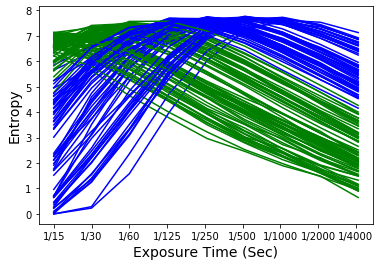

In [104]:

fig,ax = plt.subplots()
for idx in range(entropys_arr_all.shape[0]):
    if label_arr_all[idx]==0:
        c = "g"
    else:
        c = "b"
    ax.plot(np.log2(np.array(entropy_list[0])/15), entropys_arr_all[idx,:], c)
plt.xlabel("Exposure Time (Sec)", size=14)
plt.ylabel("Entropy", size=14)
ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"])

fig.savefig("entropys_imgs_labels_clustered.png")

In [22]:
# Entropy for removed background
import numpy as np
import cv2
img = cv2.imread("/home/sakuni/phd/python/lc3/rm_bg/img38_15.png", cv2.IMREAD_GRAYSCALE)
marg, bins = np.histogramdd(np.ravel(img), bins = 256)
assert bins[0][0]==0.0, "first bin not zero pixel value"
marg = marg[1:]/(img.size - marg[0])

marg = list(filter(lambda p: p > 0, np.ravel(marg)))
entropy = -np.sum(np.multiply(marg, np.log2(marg)))
entropy

7.379228248685957

In [5]:
import skimage.measure as measure
img = cv2.imread("/home/sakuni/phd/python/lc3/rm_bg/img38_15.png", cv2.IMREAD_GRAYSCALE)
entropy = measure.shannon_entropy(img)
entropy

2.931915083315548

In [7]:
type(marg)

list

In [28]:
entropy_list_single = []
exp_time_list = [15, 30, 60, 125, 250, 500, 1000, 2000, 4000]
image_path1 = "/home/sakuni/phd/objective2/dataset/single_exp/"
image_path2 = "/1024/split/images/img38.jpg"
label_path = "/home/sakuni/phd/results/all_labels/img38.txt"
labels = txt2labelarray(label_path)
for exp_time in exp_time_list:
    image_path = image_path1 + str(exp_time) + image_path2
    image = cv2.imread(image_path)
    entropys = entropy_image(image, exp_time, labels=labels)
    entropy_list_single.append(entropys)



In [29]:
entropy_arr = np.array(entropy_list_single)

In [30]:
entropy_arr

array([[1.50000000e+01, 7.30243095e+00, 5.81360829e+00],
       [3.00000000e+01, 6.70006256e+00, 6.95274165e+00],
       [6.00000000e+01, 5.91073574e+00, 7.35540206e+00],
       [1.25000000e+02, 4.97961532e+00, 7.18289768e+00],
       [2.50000000e+02, 4.12190122e+00, 6.70042354e+00],
       [5.00000000e+02, 3.23284239e+00, 5.99864756e+00],
       [1.00000000e+03, 2.29349965e+00, 5.23161059e+00],
       [2.00000000e+03, 1.78529250e+00, 4.44617367e+00],
       [4.00000000e+03, 1.47727177e+00, 3.77025660e+00]])

In [91]:
def plot_entropys(entropy_arr):
    fig,ax = plt.subplots()
    color_list = ["r", "g", "b"]
    labels = ["Full Image", "Split in Bright Spot", "Split Outside Bright Spot"]
    for idx in range(entropy_arr.shape[1]-1):
        ax.plot(np.log2(entropy_arr[:,0]/15), entropy_arr[:,idx+1], color_list[idx], label=labels[idx])
    plt.xlabel("Exposure Time (Sec)", size=14)
    plt.ylabel("Entropy", size=14)
    ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"])
    ax.legend()
    fig.savefig("entropys_img.png")

/tmp/ipykernel_25431/111650766.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"])


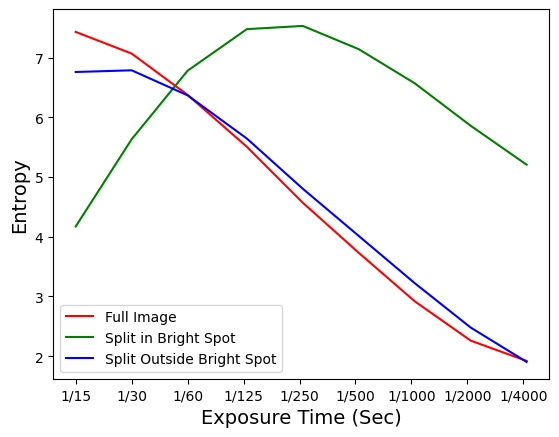

In [92]:
plot_entropys(entropy_arr)

In [108]:
def plot_entropys_rows(entropy_arr, entropy_arr2=False):
    fig,ax = plt.subplots()
    for idx in range(entropy_arr.shape[0]-1):
        ax.plot(np.log2(entropy_arr[0,:]/15), entropy_arr[idx+1, :], "r")
    
    plt.xlabel("Exposure Time (Sec)", size=14)
    plt.ylabel("Entropy", size=14)
    ax.set_xticklabels(["0", "1/15", "1/30", "1/60", "1/125", "1/250", "1/500", "1/1000", "1/2000", "1/4000"])       
#     fig.savefig("entropys_imgs_labels.png")
    plt.show()

In [ ]:
image_path2 = "/1024/split/images/"
entropy_list_full_image = [exp_time_list]
print(entropy_list_full_image)
for image_path in glob.glob("/home/aru/phd/objective2/dataset/single_exp/60/1024/split/images/*.jpg"):
    image_name = os.path.basename(image_path)
    entropys_per_exp = []
    for exp_time in exp_time_list:
        image_path = image_path1 + str(exp_time) + image_path2 + image_name
        image = cv2.imread(image_path)
        entropys = entropy_images(image, exp_time)
        entropys_per_exp.append(entropys)
    entropy_list_full_image.append(entropys_per_exp)

entropys_arr_full_image = np.array(entropy_list_full_image)


[[15, 30, 60, 125, 250, 500, 1000, 2000, 4000]]


In [ ]:
plot_entropys_rows(entropys_arr_full_image)